In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [2]:
kickstarter = pd.read_csv('./ks-projects-201801.csv')
kickstarter.head(3)
display(kickstarter.shape)
display(kickstarter.columns)
display(kickstarter.describe())

(378661, 15)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.0000,378661.0000,378661.0000,378661.0000,374864.0000,378661.0000,378661.0000
mean,1074731191.9888,49080.7915,9682.9793,105.6175,7036.7289,9058.9241,45454.4015
std,619086204.3226,1183391.2591,95636.0100,907.1850,78639.7453,90973.3431,1152950.0551
min,5971.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0100
25%,538263516.0000,2000.0000,30.0000,2.0000,16.9800,31.0000,2000.0000
50%,1075275634.0000,5200.0000,620.0000,12.0000,394.7200,624.3300,5500.0000
75%,1610148624.0000,16000.0000,4076.0000,56.0000,3034.0900,4050.0000,15500.0000
max,2147476221.0000,100000000.0000,20338986.2700,219382.0000,20338986.2700,20338986.2700,166361390.7100


In [3]:
kickstarter.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [4]:
kickstarter_classify = kickstarter[kickstarter.state.isin(['failed', 'successful'])]
kickstarter_classify.state.value_counts(normalize=True)

failed       0.5961
successful   0.4039
Name: state, dtype: float64

In [5]:
kickstarter_classify.main_category.value_counts()


Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

In [6]:
category_crosstab = pd.crosstab(kickstarter_classify.main_category,kickstarter_classify.state)
category_crosstab['success_rate'] = category_crosstab.successful/(category_crosstab.successful+category_crosstab.failed)
display(category_crosstab.sort_values(by="success_rate", ascending=False))


state,failed,successful,success_rate
main_category,,,
Dance,1235,2338,0.6544
Theater,3708,6534,0.6380
Comics,4036,5842,0.5914
Music,21752,24197,0.5266
Art,14131,11510,0.4489
Games,16003,12518,0.4389
Film & Video,32904,23623,0.4179
Design,14814,10550,0.4159
Publishing,23145,12300,0.3470


In [7]:
kickstarter_classify.currency.value_counts()


USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [8]:
currency_crosstab = pd.crosstab(kickstarter_classify.currency,kickstarter_classify.state)
currency_crosstab['success_rate'] = currency_crosstab.successful/(currency_crosstab.successful+currency_crosstab.failed)
currency_crosstab.sort_values(by="success_rate", ascending=False)

state,failed,successful,success_rate
currency,,,
HKD,261,216,0.4528
USD,152132,109379,0.4183
GBP,17395,12081,0.4099
SGD,276,178,0.3921
DKK,567,362,0.3897
NZD,826,448,0.3516
SEK,1001,509,0.3371
CAD,8238,4137,0.3343
JPY,16,7,0.3043


In [9]:
kickstarter_classify.loc[0]

ID                                       1000002330
name                The Songs of Adelaide & Abullah
category                                     Poetry
main_category                            Publishing
currency                                        GBP
deadline                                 2015-10-09
goal                                      1000.0000
launched                        2015-08-11 12:12:28
pledged                                      0.0000
state                                        failed
backers                                           0
country                                          GB
usd pledged                                  0.0000
usd_pledged_real                             0.0000
usd_goal_real                             1533.9500
Name: 0, dtype: object

In [10]:
kickstarter_classify['launched_date'] = pd.to_datetime(kickstarter_classify.launched)
kickstarter_classify['deadline_date'] = pd.to_datetime(kickstarter_classify.deadline)
kickstarter_classify['duration'] = (kickstarter_classify.deadline_date - kickstarter_classify.launched_date).dt.days

display(kickstarter_classify.head(3))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500,2015-08-11 12:12:28,2015-10-09,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000,2017-09-02 04:43:57,2017-11-01,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000,2013-01-12 00:20:50,2013-02-26,44


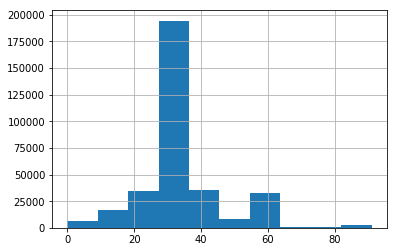

In [11]:
kickstarter_classify.duration.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10dfeb908>,
      dtype=object)

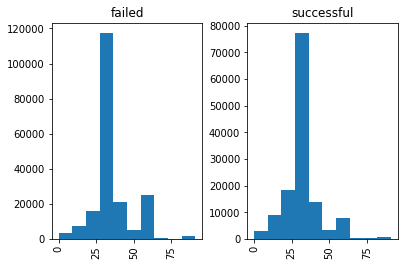

In [12]:
kickstarter_classify.duration.hist(by=kickstarter_classify.state)

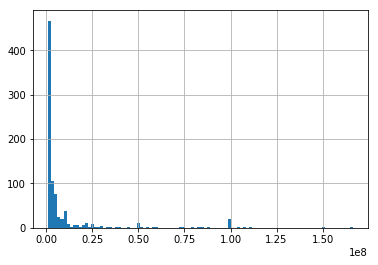

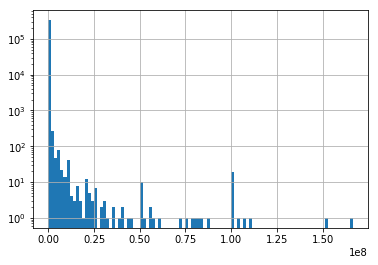

In [13]:
filtered = kickstarter_classify[kickstarter_classify.usd_goal_real > 1000000]

display(filtered.usd_goal_real.hist(bins=100,log=False))
plt.figure()
display(kickstarter_classify.usd_goal_real.hist(bins=100, log=True))


In [14]:
kickstarter_classify.corr()


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,1.0000,0.0019,0.0009,0.0008,-0.0003,0.0003,0.0018,0.0028
goal,0.0019,1.0000,0.0080,0.0048,0.0064,0.0060,0.9526,0.0227
pledged,0.0009,0.0080,1.0000,0.7173,0.8580,0.9536,0.0057,0.0081
backers,0.0008,0.0048,0.7173,1.0000,0.6975,0.7523,0.0052,-0.0000
usd pledged,-0.0003,0.0064,0.8580,0.6975,1.0000,0.9077,0.0070,0.0077
usd_pledged_real,0.0003,0.0060,0.9536,0.7523,0.9077,1.0000,0.0064,0.0087
usd_goal_real,0.0018,0.9526,0.0057,0.0052,0.0070,0.0064,1.0000,0.0216
duration,0.0028,0.0227,0.0081,-0.0000,0.0077,0.0087,0.0216,1.0000


In [15]:
kickstarter_classify.isnull().sum(axis = 0)


ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
launched_date         0
deadline_date         0
duration              0
dtype: int64

In [16]:
kickstarter_variables = kickstarter_classify[['usd_goal_real', 'backers', 'main_category', 'duration', 'currency']]
kickstarter_y = pd.get_dummies(data=kickstarter_classify['state'], drop_first=True)

display(kickstarter_variables.head(5))
display(kickstarter_y.head(5))


,usd_goal_real,backers,main_category,duration,currency
0,1533.9500,0,Publishing,58,GBP
1,30000.0000,15,Film & Video,59,USD
2,45000.0000,3,Film & Video,44,USD
3,5000.0000,1,Music,29,USD
5,50000.0000,224,Food,34,USD


,successful
0,0
1,0
2,0
3,0
5,1


In [17]:
kickstarter_x = pd.get_dummies(data=kickstarter_variables, columns=['main_category', 'currency'], drop_first=True)
kickstarter_x.head()

,usd_goal_real,backers,duration,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1533.9500,0,58,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0000,15,59,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0000,3,44,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0000,1,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0000,224,34,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kickstarter_x, kickstarter_y, test_size=0.2)
display(X_train.shape)

(265340, 30)

In [19]:
from sklearn.linear_model import LogisticRegression
ks_model = LogisticRegression().fit(X_train, y_train)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn.metrics import confusion_matrix

y_pred_test = ks_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

totals = cm.sum(axis=1)
cm_total = [totals,totals]
display(cm.sum(axis=1))
m2 = ((cm/cm_total)*100).astype(int)
display(m2)


array([39488, 26847])

array([[95,  6],
       [10, 83]])

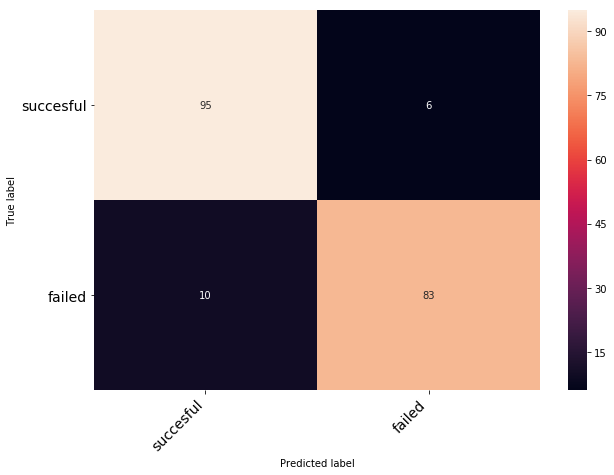

In [33]:

from confussion import print_confusion_matrix
print_confusion_matrix(m2,['succesful','failed'])


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.9596130612450986

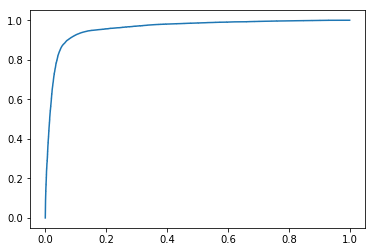

In [38]:
from sklearn import metrics

y_pred_proba = ks_model.predict_proba(X_test)[::,1]
fprL, tprL, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fprL,tprL)
display(auc)

In [36]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier().fit(X_train, y_train)

y_pred_test_rf = ks_rf.predict(X_test)
confusion_matrix(y_test, y_pred_test_rf)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([[36981,  2507],
       [ 2700, 24147]])

0.9684848680346864

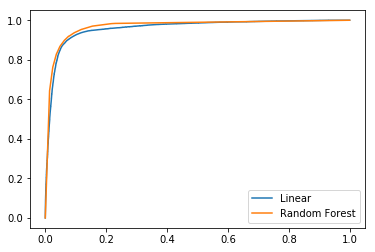

In [41]:
y_pred_proba_rf = ks_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fprL,tprL)
plt.plot(fpr,tpr)
plt.legend(['Linear','Random Forest'])
display(auc)